## Model for Traffic in Davidson
Made by James Durcan, Nolan Elder, and Jackson McDonald

The code below handles all of the imports needed to run the symulation

In [1]:
!pip install numpy matplotlib
from gameboard import GameBoard
from gameboard_post_construction import GameBoard2
import matplotlib.pyplot as plt
import numpy as np

## Current Traffic Simulation
The following code runs the simulation with Gameboard one which is desinged around current traffic

In [2]:
time = 0
hour = 3600
board = GameBoard(1.25 * hour)
#indexs based on the enum in the cars class. To includes an index 0 for all directions
to = [0]*5
num_to = [0]*5
came_from = [0]*4
num_from = [0]*4
while time < 1.5*hour:
    commutes = board.time_seg(time)
    if time >= 0.25 * hour:
        if(len(commutes)>0):
            for i in range(len(commutes)):
                commute_time = time - commutes[i].get_spawn_time()
                direction_to = commutes[i].get_road_to()
                direction_from = commutes[i].get_road_from()
                to[direction_to] += commute_time
                num_to[direction_to] += 1
                came_from[direction_from-1] += commute_time
                num_from[direction_from-1] += 1
                to[0] += commute_time
                num_to[0] += 1
    time += 1
#find the avarages from the sum of commute times and cars
for i in range(len(to)):
    to[i] = to[i] / num_to[i]
    to[i] = to[i] / 60
for i in range(len(came_from)):
    came_from[i] = came_from[i] / num_from[i]
    came_from[i] = came_from[i] / 60
print("All following times provided are in minutes.")
print(f"Griffith; average time to: {to[1]:.2f}, average time from: {came_from[0]:.2f}, total cars to: {num_to[1]}, total cars from: {num_from[0]}.")
print(f"Main st north; average time to: {to[2]:.2f}, average time from: {came_from[1]:.2f}, total cars to: {num_to[2]}, total cars from: {num_from[1]}.")
print(f"Main st south; average time to: {to[3]:.2f}, average time from: {came_from[2]:.2f}, total cars to: {num_to[3]}, total cars from: {num_from[2]}.")
print(f"Concord; average time to: {to[4]:.2f}, average time from: {came_from[3]:.2f}, total cars to: {num_to[4]}, total cars from: {num_from[3]}.")
print(f"For all commuters; average time of commute: {to[0]:.2f}, total cars: {num_to[0]}.")

All following times provided are in minutes.
Griffith; average time to: 9.52, average time from: 7.60, total cars to: 1563, total cars from: 538.
Main st north; average time to: 8.47, average time from: 6.90, total cars to: 477, total cars from: 556.
Main st south; average time to: 9.47, average time from: 10.12, total cars to: 514, total cars from: 1158.
Concord; average time to: 6.03, average time from: 8.16, total cars to: 789, total cars from: 1091.
For all commuters; average time of commute: 8.54, total cars: 3343.


## Post Project Simulation
The following code runs the simulation with the Gameboard that includes the roundabouts at Griffith/Beaty/Sloan, Main/Potts, and the connection between Sloan and Potts

In [3]:
time = 0
hour = 3600
board = GameBoard2(1.25 * hour)
#indexs based on the enum in the cars class. To includes an index 0 for all directions
to = [0]*5
num_to = [0]*5
came_from = [0]*4
num_from = [0]*4
while time < 1.5*hour:
    commutes = board.time_seg(time)
    if time >= 0.25 * hour:
        if(len(commutes)>0):
            for i in range(len(commutes)):
                commute_time = time - commutes[i].get_spawn_time()
                direction_to = commutes[i].get_road_to()
                direction_from = commutes[i].get_road_from()
                to[direction_to] += commute_time
                num_to[direction_to] += 1
                came_from[direction_from-1] += commute_time
                num_from[direction_from-1] += 1
                to[0] += commute_time
                num_to[0] += 1
    time += 1
#find the avarages from the sum of commute times and cars
for i in range(len(to)):
    to[i] = to[i] / num_to[i]
    to[i] = to[i] / 60
for i in range(len(came_from)):
    came_from[i] = came_from[i] / num_from[i]
    came_from[i] = came_from[i] / 60
print("All following times provided are in minutes.")
print(f"Griffith; average time to: {to[1]:.2f}, average time from: {came_from[0]:.2f}, total cars to: {num_to[1]}, total cars from: {num_from[0]}.")
print(f"Main st north; average time to: {to[2]:.2f}, average time from: {came_from[1]:.2f}, total cars to: {num_to[2]}, total cars from: {num_from[1]}.")
print(f"Main st south; average time to: {to[3]:.2f}, average time from: {came_from[2]:.2f}, total cars to: {num_to[3]}, total cars from: {num_from[2]}.")
print(f"Concord; average time to: {to[4]:.2f}, average time from: {came_from[3]:.2f}, total cars to: {num_to[4]}, total cars from: {num_from[3]}.")
print(f"For all commuters; average time of commute: {to[0]:.2f}, total cars: {num_to[0]}.")

All following times provided are in minutes.
Griffith; average time to: 7.75, average time from: 6.69, total cars to: 1106, total cars from: 451.
Main st north; average time to: 8.47, average time from: 7.12, total cars to: 461, total cars from: 566.
Main st south; average time to: 8.92, average time from: 8.19, total cars to: 459, total cars from: 696.
Concord; average time to: 5.90, average time from: 7.68, total cars to: 796, total cars from: 1109.
For all commuters; average time of commute: 7.54, total cars: 2822.


## Results

The code below runs multiple simulations and prints out a bar graph based on the findings

0 trials completed.
10 trials completed.
20 trials completed.
30 trials completed.
40 trials completed.
50 trials completed.
60 trials completed.
70 trials completed.
80 trials completed.
90 trials completed.


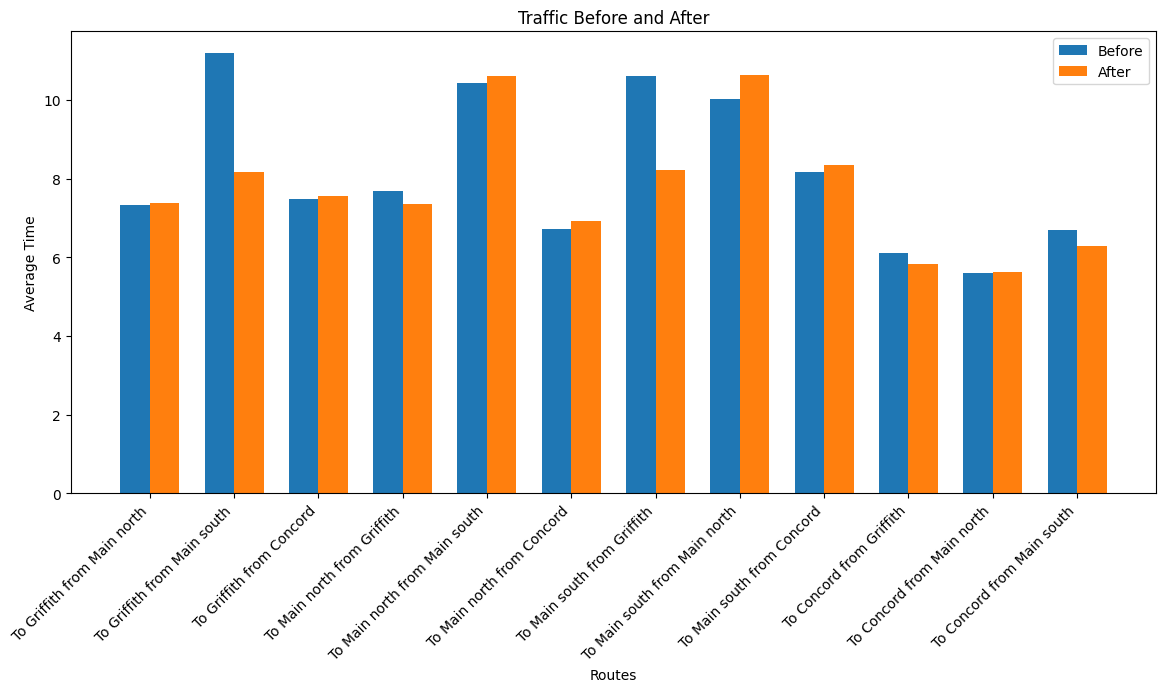

In [4]:
#initialize variable to store data
hour = 3600
pre = [0]*12
post = [0]*12
trials = 100
average_time_pre = []
average_time_post = []
#runs the simulation for trials number of times
for attempt in range(trials):
    if attempt % 10 == 0:
        print(f"{attempt} trials completed.")
    #varables for simulation
    time = 0
    time_pre = [[0]*4,[0]*4,[0]*4,[0]*4]
    num_pre = [[0]*4,[0]*4,[0]*4,[0]*4]
    time_post = [[0]*4,[0]*4,[0]*4,[0]*4]
    num_post = [[0]*4,[0]*4,[0]*4,[0]*4]
    board1 = GameBoard(1.25 * hour)
    board2 = GameBoard2(1.25 * hour)
    total_time_pre = 0
    total_cars_pre = 0
    total_time_post = 0
    total_cars_post = 0
    #runs the simulation
    while time < 1.5*hour:
        commutes = board1.time_seg(time)
        if time >= 0.25 * hour:
            if(len(commutes)>0):
                for i in range(len(commutes)):
                    commute_time = time - commutes[i].get_spawn_time()
                    time_pre[commutes[i].get_road_to()-1][commutes[i].get_road_from()-1] += commute_time
                    num_pre[commutes[i].get_road_to()-1][commutes[i].get_road_from()-1] += 1
                    total_time_pre += commute_time
                    total_cars_pre += 1
        commutes = board2.time_seg(time)
        if time >= 0.25 * hour:
            if(len(commutes)>0):
                for i in range(len(commutes)):
                    commute_time = time - commutes[i].get_spawn_time()
                    time_post[commutes[i].get_road_to()-1][commutes[i].get_road_from()-1] += commute_time
                    num_post[commutes[i].get_road_to()-1][commutes[i].get_road_from()-1] += 1
                    total_time_post += commute_time
                    total_cars_post += 1
        time += 1
    #reformats the array and calulates averages
    for i in range(4):
        for j in range(4):
            if time_pre[i][j] == 0:
                del time_pre[i][j]
                del num_pre[i][j]
                break
    for i in range(4):
        for j in range(4):
            if time_post[i][j] == 0:
                del time_post[i][j]
                del num_post[i][j]
                break
    for i in range(4):
        for j in range(3):
            time_pre[i][j] = time_pre[i][j] / num_pre[i][j]
            time_post[i][j] = time_post[i][j] / num_post[i][j]
    time_pre = time_pre[0] + time_pre[1] + time_pre[2] + time_pre[3]
    time_post = time_post[0] + time_post[1] + time_post[2] + time_post[3]
    #stores results
    for i in range(12):
        pre[i] += time_pre[i]
        post[i] += time_post[i]
    average_time_pre.append(total_time_pre / (total_cars_pre * 60))
    average_time_post.append(total_time_post / (total_cars_post * 60))
#averages across all trials
for i in range(12):
    pre[i] = pre[i] / (trials*60)
    post[i] = post[i] / (trials*60)
#setting up the graph
to_G_routes = ['To Griffith from Main north', 'To Griffith from Main south', 'To Griffith from Concord']
to_N_routes = ['To Main north from Griffith', 'To Main north from Main south', 'To Main north from Concord']
to_S_routes = ['To Main south from Griffith', 'To Main south from Main north', 'To Main south from Concord']
to_C_routes = ['To Concord from Griffith', 'To Concord from Main north', 'To Concord from Main south']
routes = to_G_routes + to_N_routes + to_S_routes + to_C_routes
x = np.arange(len(routes))
width = 0.35
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, pre, width, label='Before')
bars2 = ax.bar(x + width/2, post, width, label='After')
ax.set_xlabel('Routes')
ax.set_ylabel('Average Time')
ax.set_title('Traffic Before and After')
ax.set_xticks(x)
ax.set_xticklabels(routes, rotation=45, ha='right')
ax.legend()

plt.show()

## Variance Between Trials
The following code print a historam that displays the variance in average time between simulations.

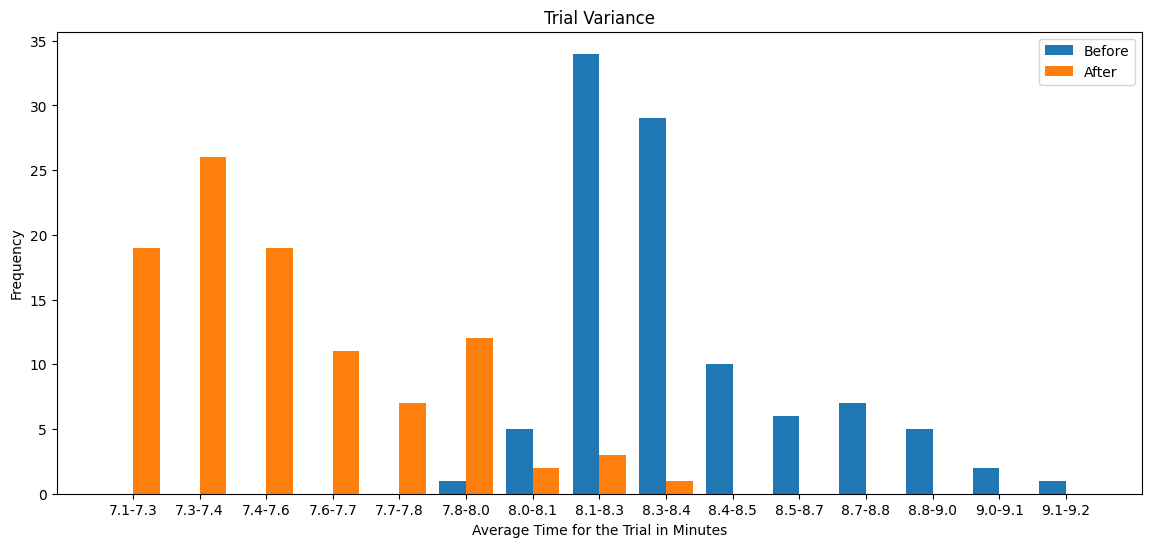

In [5]:
bins = np.histogram_bin_edges(average_time_pre + average_time_post, bins=15)
counts1, _ = np.histogram(average_time_pre, bins)
counts2, _ = np.histogram(average_time_post, bins)
bar_width = 0.4
x = np.arange(len(counts1))
fig, ax = plt.subplots(figsize=(14, 6))
plt.bar(x - bar_width/2, counts1, width=bar_width, label='Before')
plt.bar(x + bar_width/2, counts2, width=bar_width, label='After')
bin_labels = [f"{bins[i]:.1f}-{bins[i+1]:.1f}" for i in range(len(bins)-1)]
plt.xticks(x, bin_labels)

plt.xlabel('Average Time for the Trial in Minutes')
plt.ylabel('Frequency')
plt.title('Trial Variance')
plt.legend()
plt.show()

In [6]:
average_pre = 0
for i in range(len(average_time_pre)):
    average_pre += average_time_pre[i]
average_pre = average_pre / len(average_time_pre)
print(f"Average time before is {average_pre}.")

average_post = 0
for i in range(len(average_time_post)):
    average_post += average_time_post[i]
average_post = average_post / len(average_time_post)
print(f"Average time before is {average_post}.")

Average time before is 8.377929642042073.
Average time before is 7.533140579244983.
